In [131]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# np.seterr(divide='ignore', invalid='ignore')
plt.rcParams['figure.figsize'] = [55, 50]

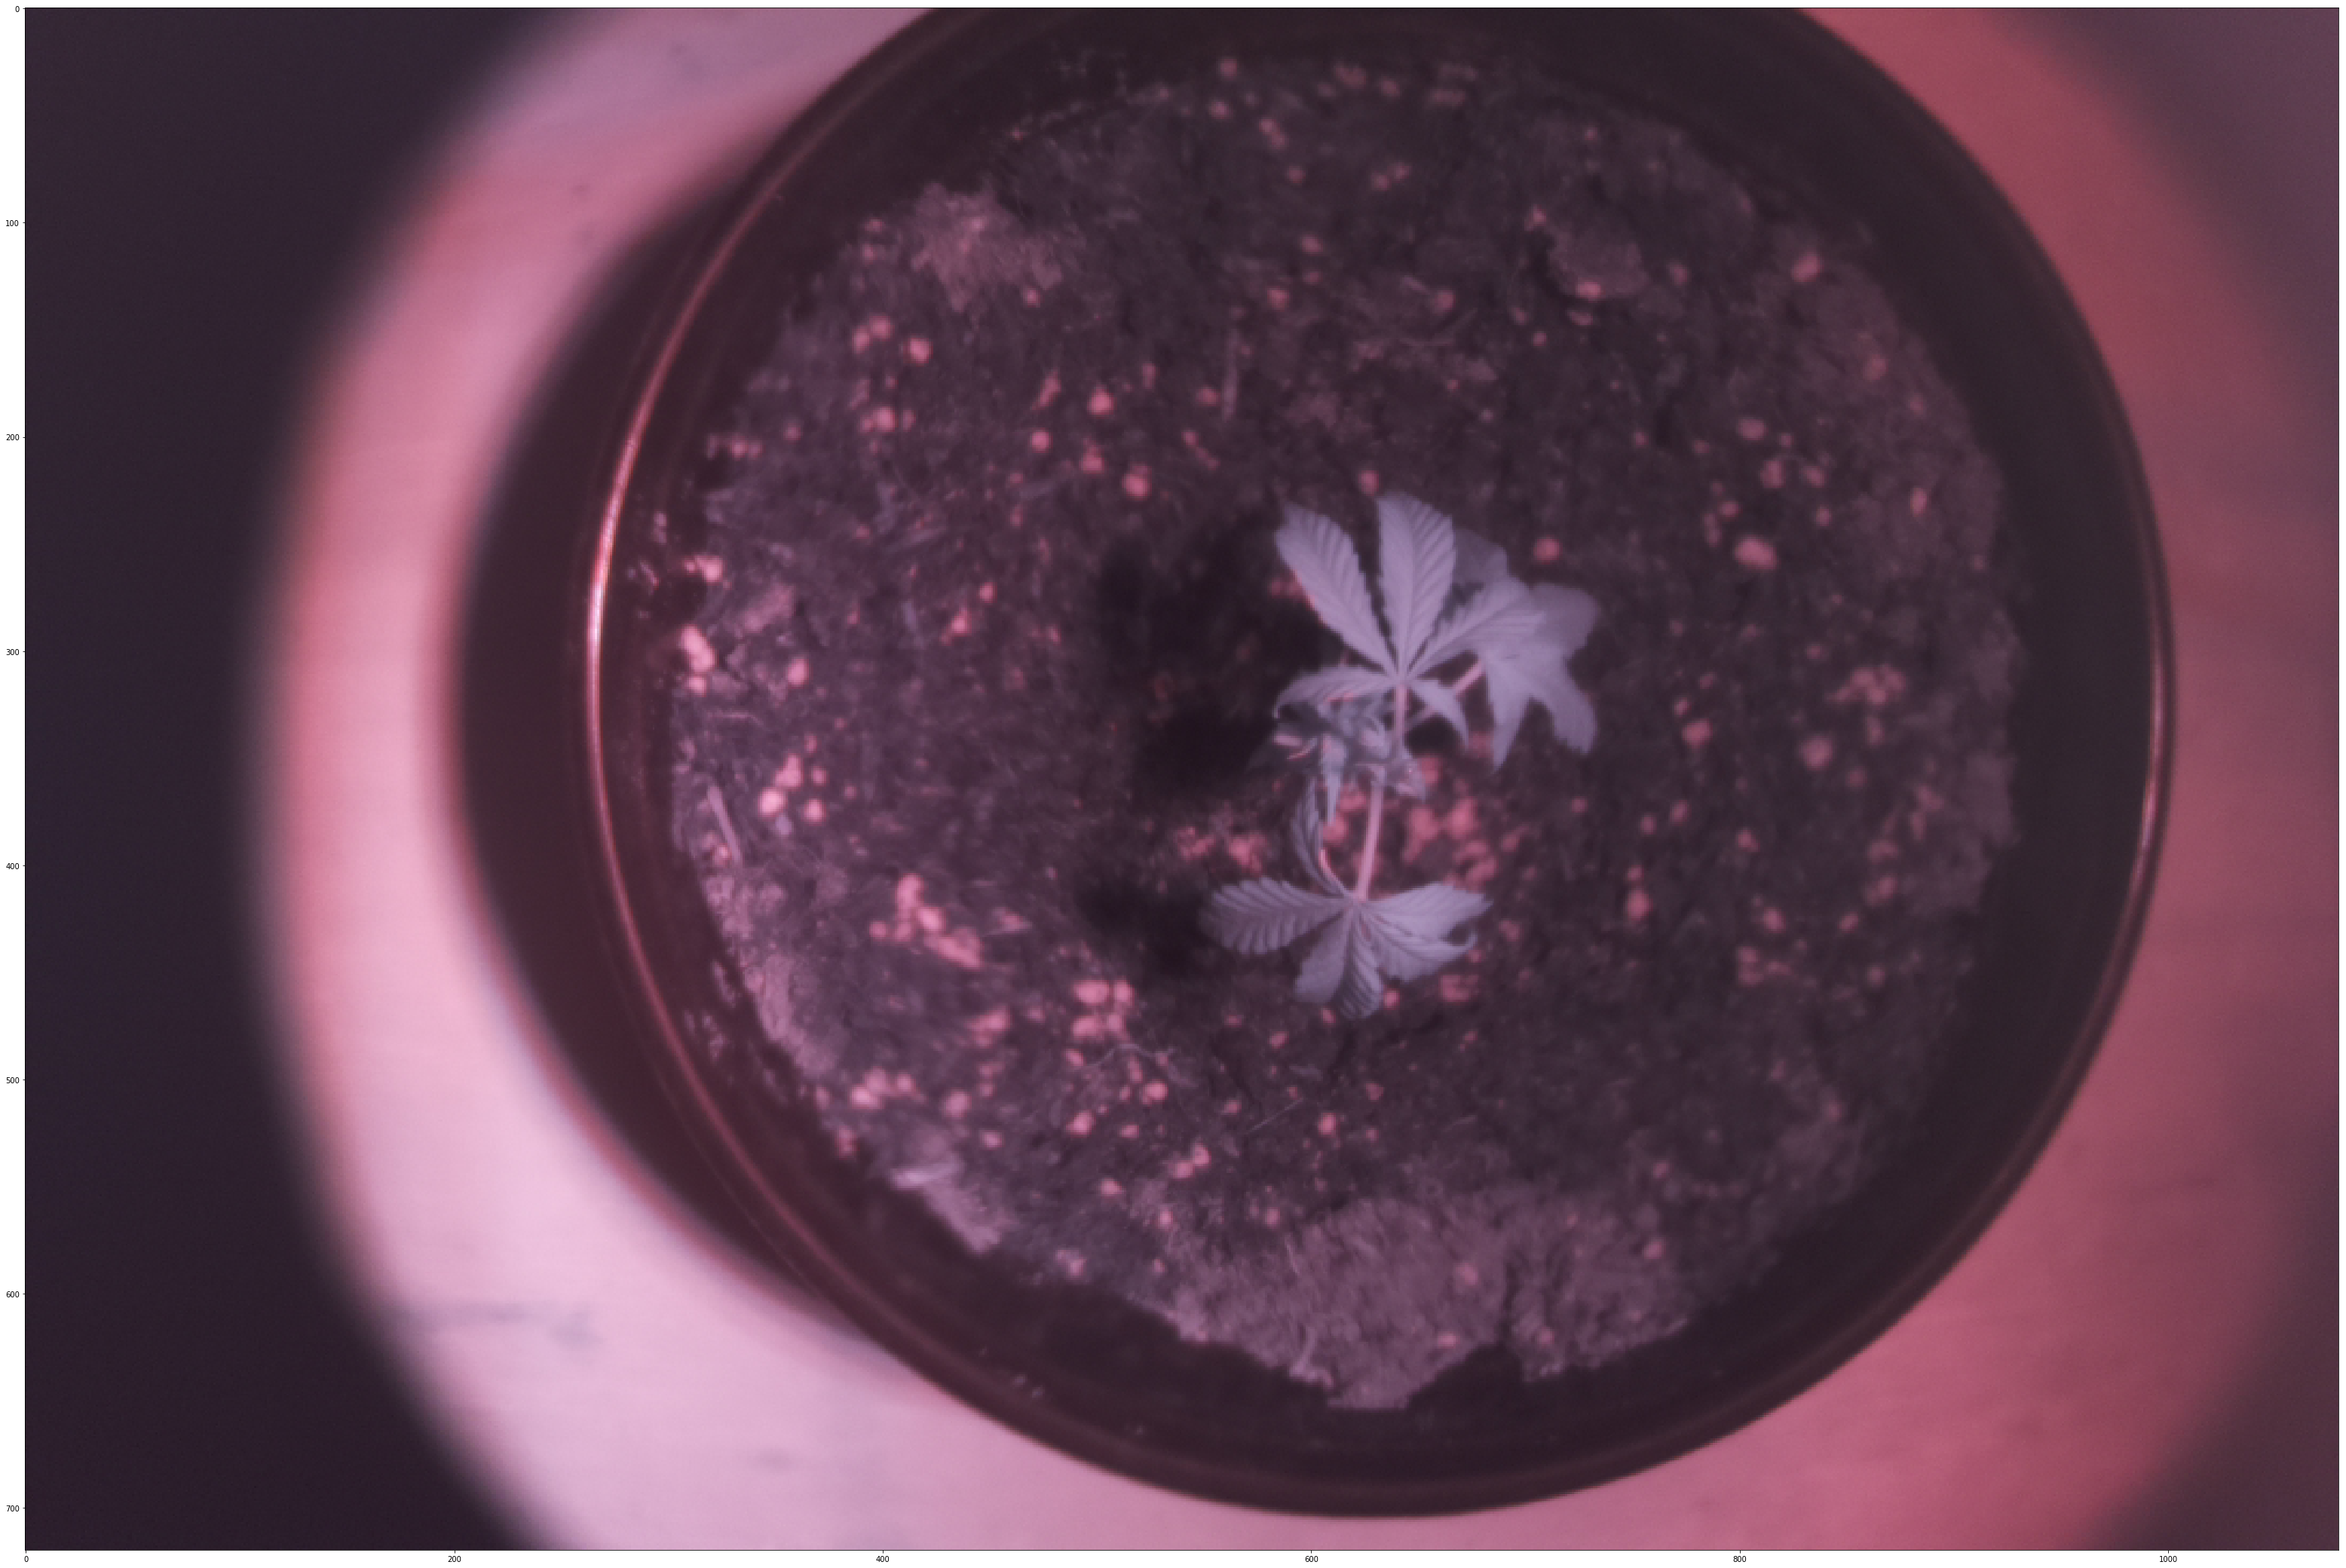

In [132]:
# img = cv2.imread("data/sat/sat_0.png")
filename = "data/newb/2/test2.png"
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

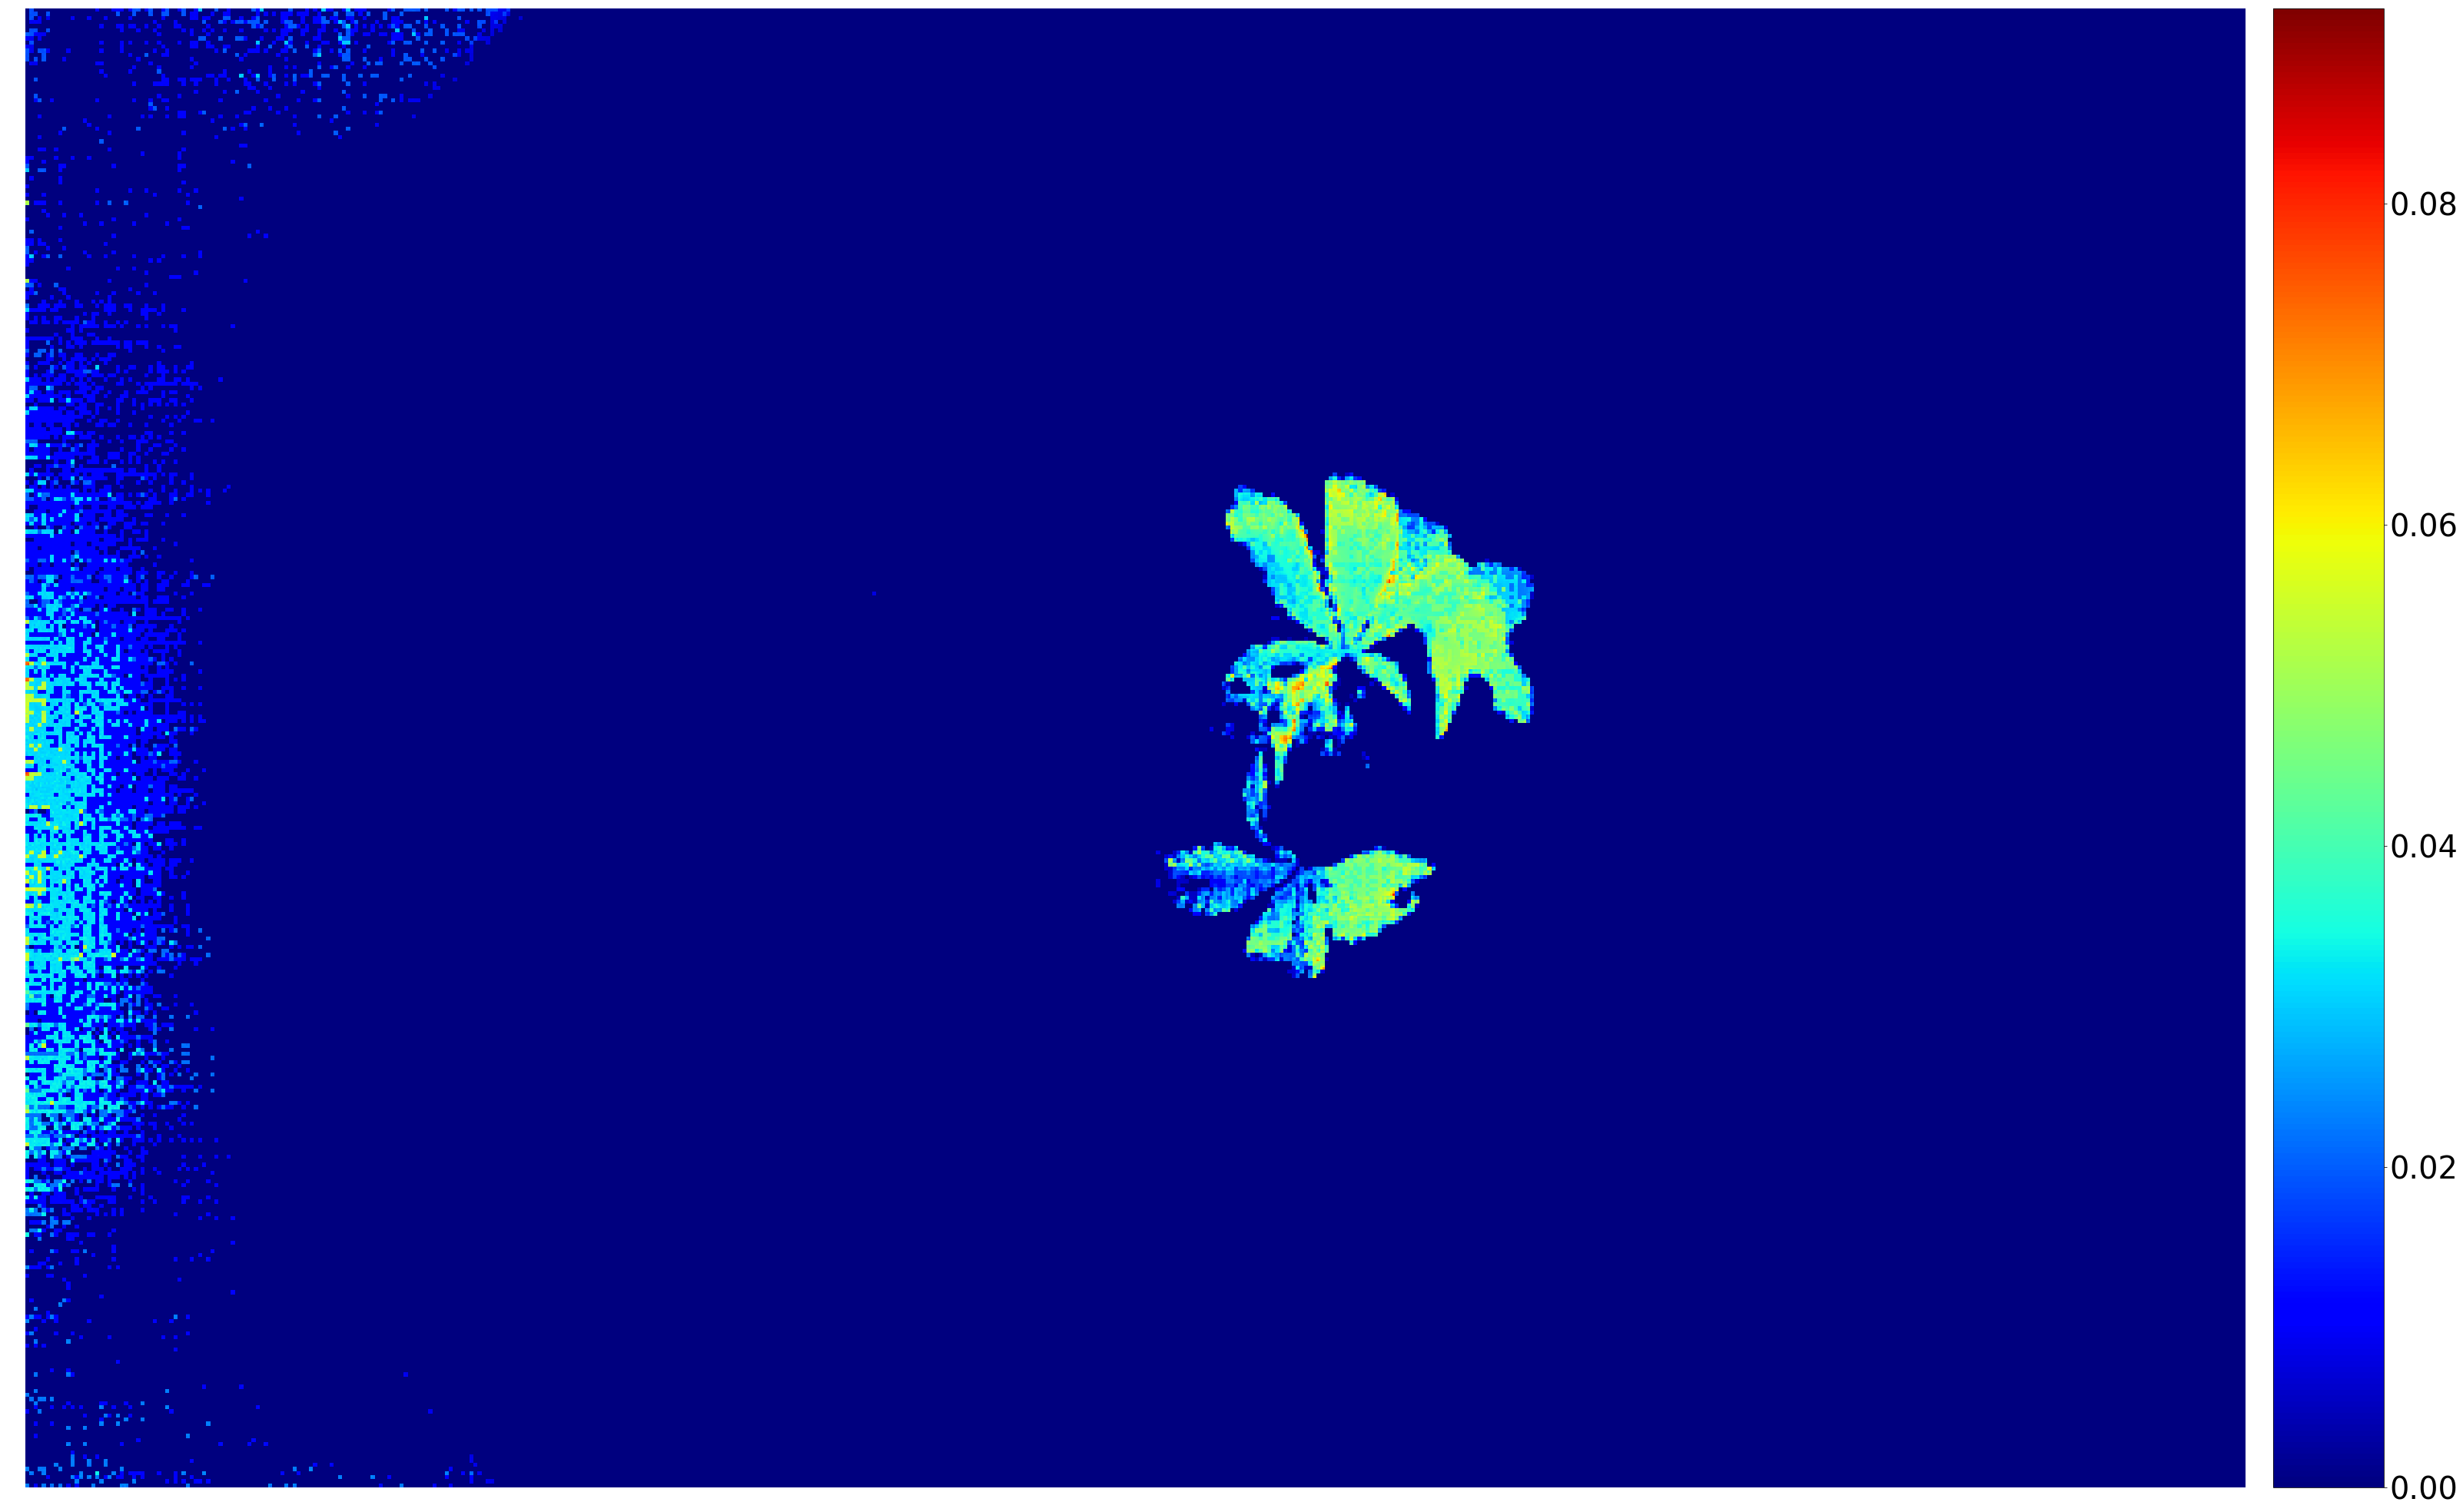

In [133]:
# img = cv2.resize(img, (img.shape[1],img.shape[0]))
r,g,b = img[::,::,0].astype('float'), img[::,::,1].astype('float'), img[::,::,2].astype('float')
topDiff = (b - r)
botSum = (b + r)
botSum[botSum == 0] = 0.0001
ndvi = (topDiff)/(botSum)
ndvi[np.isnan(ndvi)] = 0
ndvi *= (ndvi > 0)

ax = plt.gca()
ax.yaxis.label.set_size(10)
im = ax.imshow(ndvi,cmap="jet")
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
cb = plt.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=40)
ax.axis('off')
plt.savefig("ndvi_{}.png".format(filename.split("/")[-1]))

Text(0,0.5,'nir')

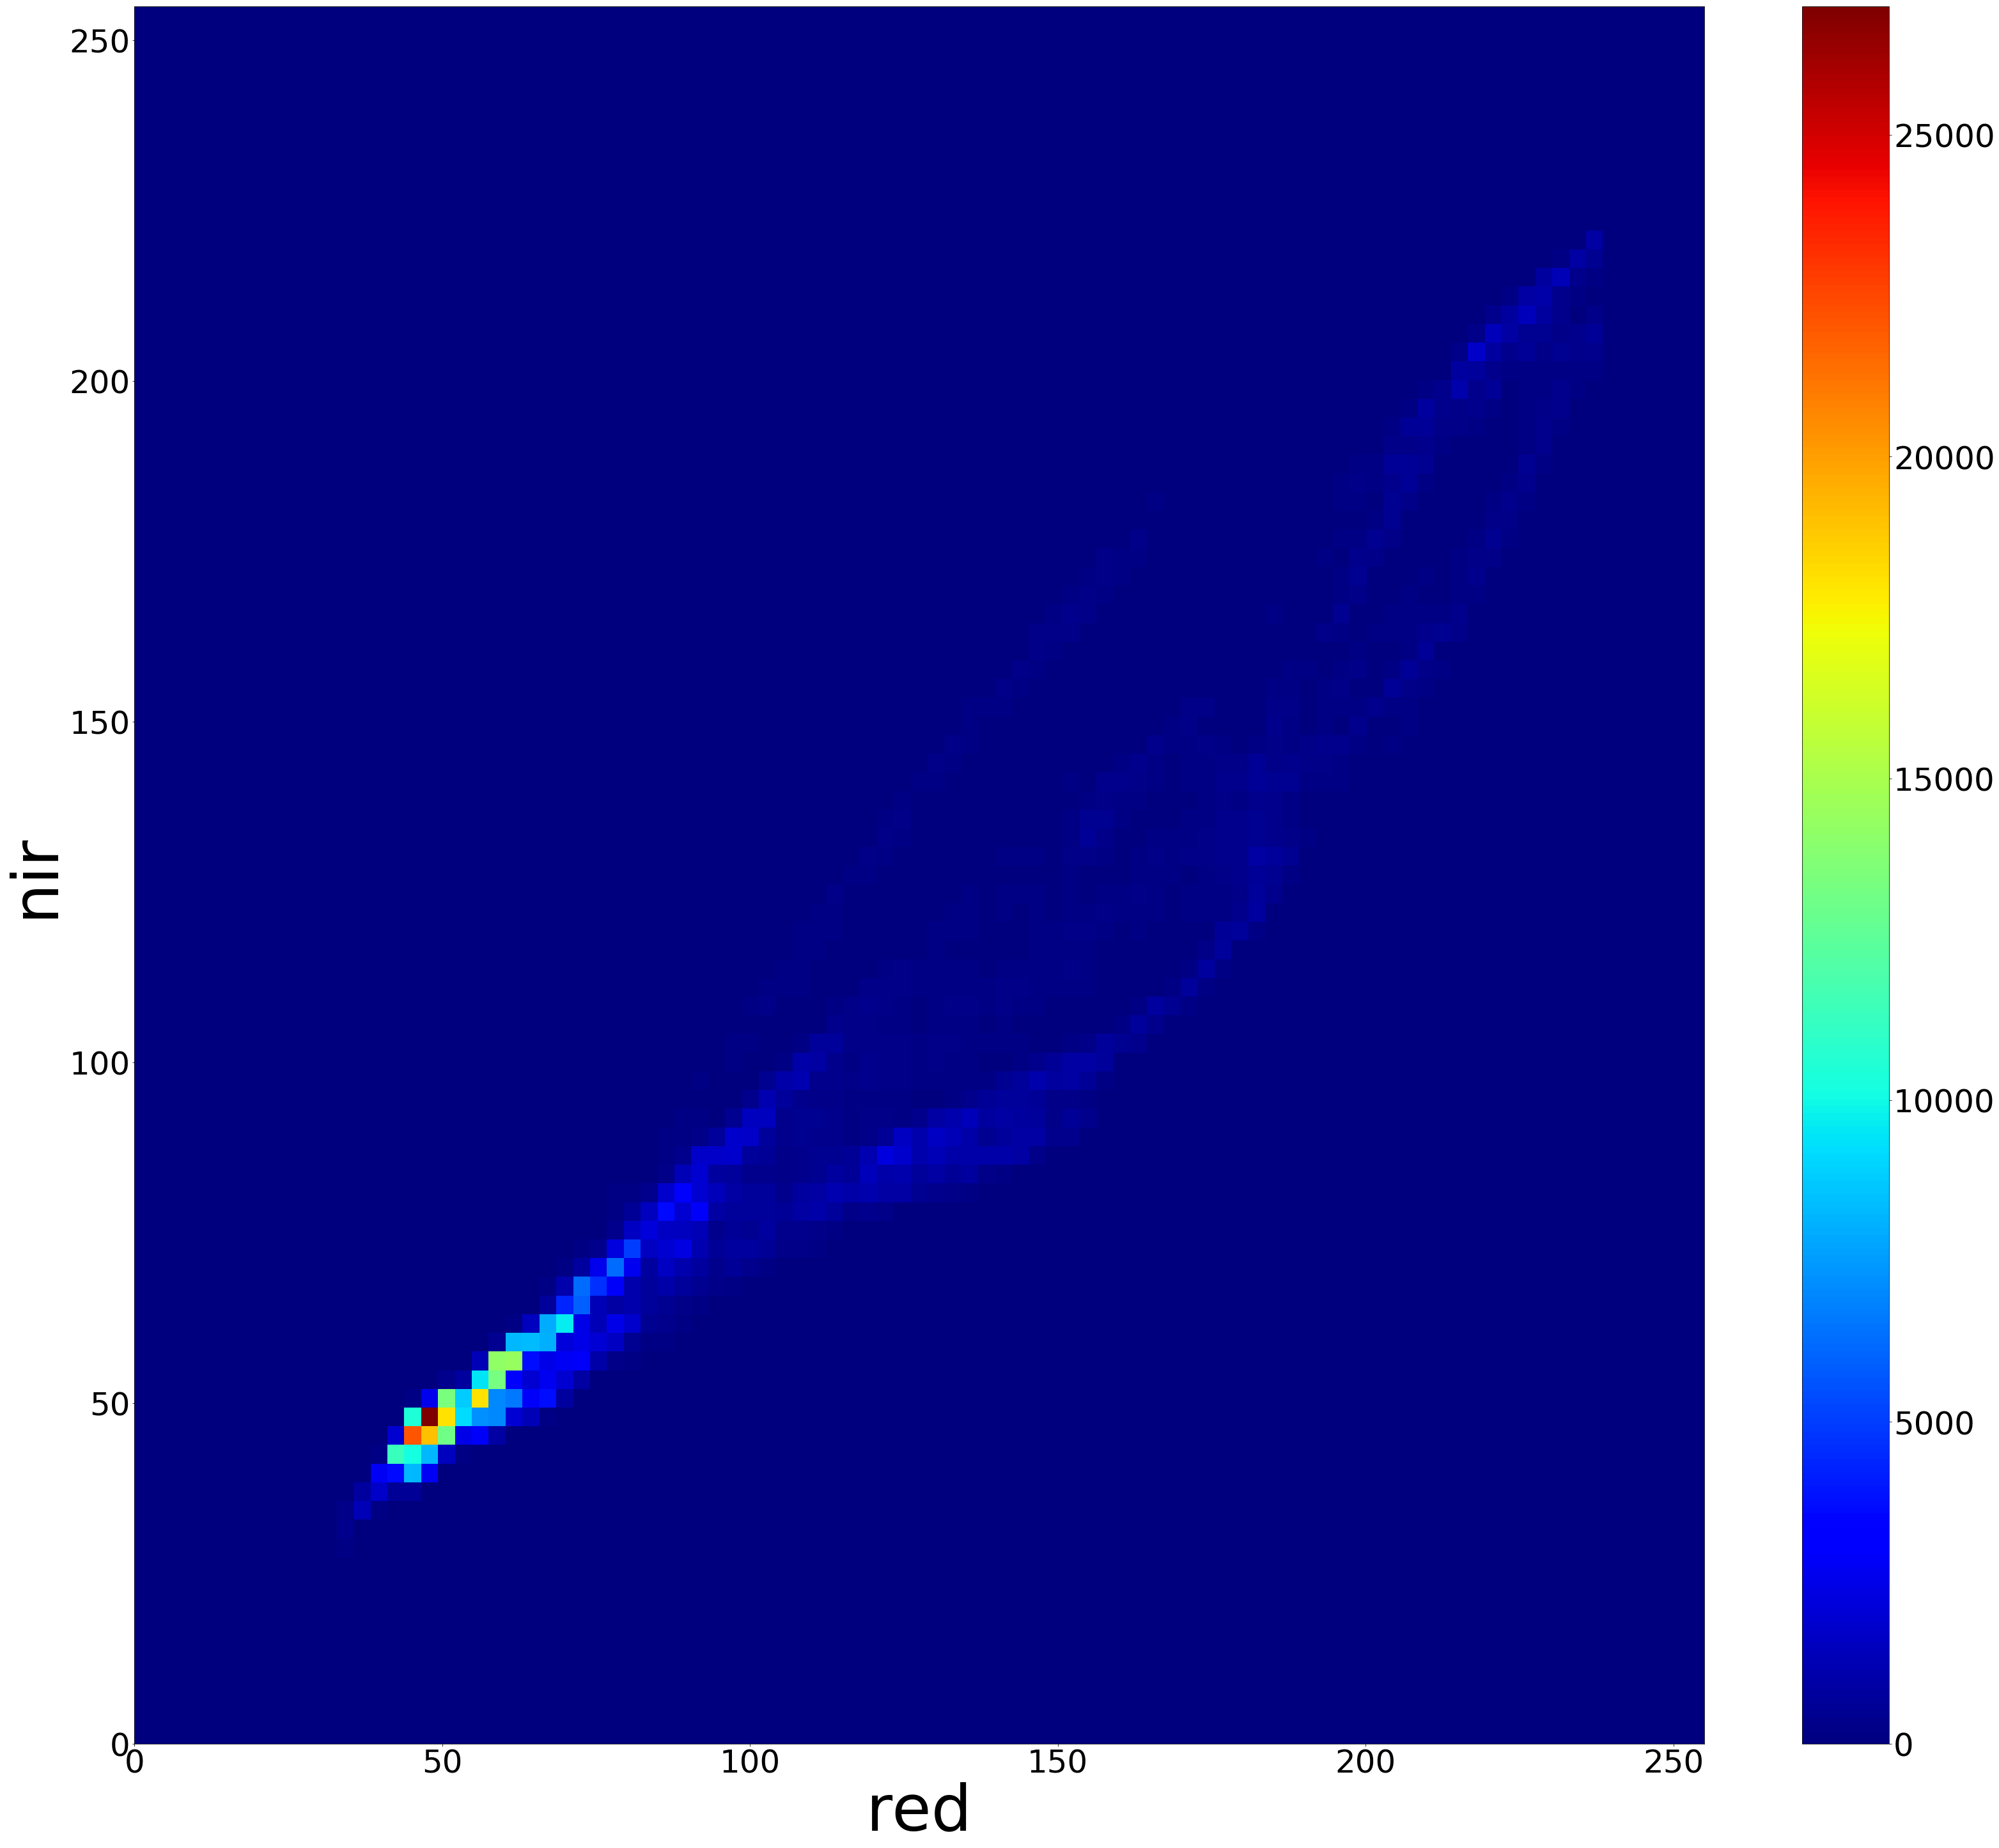

In [134]:
nir = img[::,::,2].astype('float').flatten()
red = img[::,::,0].astype('float').flatten()

# lets try and crop this first, the non veg values are making this confusing
hst = plt.hist2d(red,nir, 93,[[0, 255], [0, 255]],  cmap="jet" )
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=50)
plt.tick_params(labelsize=50)
plt.xlabel('red',fontsize=100)
plt.ylabel('nir',fontsize=100)
# plt.savefig("ndvi_{}_feature_space.png".format(filename.split("/")[-1]))